In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.linear_model import LinearRegression
from linreg_gd import LinearRegressionUsingGD
import plotly.graph_objects as go

np.random.seed(0)

In [2]:
n_train = 500
n_test = 50

x_train = np.hstack((np.random.rand(n_train, 1), np.ones((n_train, 1))))
y_train = (2 + 3 * x_train[:, 0] + np.random.rand(n_train)).reshape(n_train, 1)
print(x_train.shape, y_train.shape)

(500, 2) (500, 1)


In [3]:
x_test = np.hstack((np.random.rand(n_test, 1), np.ones((n_test, 1))))
y_test = (2 + 3 * x_test[:, 0] + np.random.rand(n_test)).reshape(n_test, 1)
print(x_test.shape, y_test.shape)

(50, 2) (50, 1)


In [4]:
model = LinearRegressionUsingGD()

model.fit(x_train, y_train)

In [5]:
y_pred = model.predict(x_test)

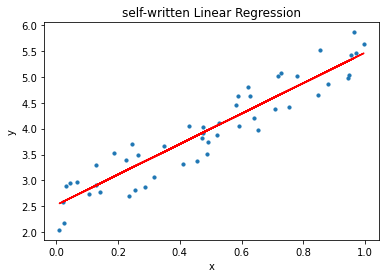

In [6]:
plt.scatter(x_test[:, 0], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('self-written Linear Regression')

# predicted values
plt.plot(x_test[:, 0], y_pred, color='r')
plt.show()

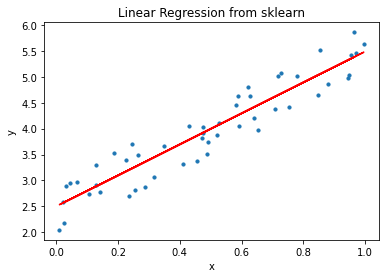

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.scatter(x_test[:, 0], y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression from sklearn')

# predicted values
plt.plot(x_test[:, 0], y_pred, color='r')
plt.show()

### Multidimensional case:

In [8]:
n_dim = 2
n_train = 10
n_test = 50

x_train = np.hstack((np.random.rand(n_train, n_dim), np.ones((n_train, 1))))
y_train = (2 + 3 * x_train[:, 0] + 4*x_train[:, 1] - x_train[:, 2] + np.random.rand(n_train)).reshape(n_train, 1)
print(x_train.shape, y_train.shape)

x_test = np.hstack((np.random.rand(n_test, n_dim), np.ones((n_test, 1))))
y_test = (2 + 3 * x_test[:, 0] + 4*x_test[:, 1] - x_test[:, 2]+ np.random.rand(n_test)).reshape(n_test, 1)
print(x_test.shape, y_test.shape)

(10, 3) (10, 1)
(50, 3) (50, 1)


In [9]:
n_iters = 10000
my_model = LinearRegressionUsingGD(n_iterations=n_iters)
sk_model = LinearRegression()

my_model.fit(x_train, y_train)
sk_model.fit(x_train, y_train)

y_pred_my = my_model.predict(x_test)
y_pred_sk = sk_model.predict(x_test)

print(np.sum((y_pred_my - y_pred_sk)**2) / n_test)

2.0433135542602636e-22


In [10]:
my_model.w_

array([[2.7538387 ],
       [4.45714462],
       [1.5461677 ]])

In [19]:
if n_dim == 2:
    print('Images are interactive!!!')
    x = x_test[:, 0]
    y = x_test[:, 1]
    z_sk = sk_model.intercept_[0] + sk_model.coef_[0][0]*x + sk_model.coef_[0][1]*y
    z_my = my_model.w_[-1] + my_model.w_[0]*x + my_model.w_[1]*y
    z_true = y_test[:, 0]
    fig_sk = go.Figure(data=[
        go.Mesh3d(
            x=x,
            y=y,
            z=z_sk,
            color='red',
            showscale=True
        ),
        go.Scatter3d(
            x=x,
            y=y,
            z=z_true,
            mode='markers',
            marker=dict(
                size=5,
                color='blue',                # set color to an array/list of desired values
                opacity=0.7
            )
        )
    ])
    fig_sk.update_layout(title='LinReg from Sklearn:', autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
    fig_sk.show()
    
    fig_my = go.Figure(data=[
        go.Mesh3d(
            x=x,
            y=y,
            z=z_my,
            color='red',
            showscale=True
        ),
        go.Scatter3d(
            x=x,
            y=y,
            z=z_true,
            mode='markers',
            marker=dict(
                size=5,
                color='blue',
                opacity=0.7
            )
        )
    ])
    fig_my.update_layout(title='Self-written LinReg:', autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
    fig_my.show()

Images are interactive!!!
